# Movie Review Sentiment Analysis

In [48]:
# Import necessary libraries
import nltk
from nltk.corpus import movie_reviews, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Ensure necessary NLTK data files are downloaded
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1. Data Preparation (Preprocessing)

In [34]:
# Load the movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the documents to ensure a balanced distribution of positive and negative reviews
random.shuffle(documents)

# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_document(document):
    # Tokenize the document
    tokens = word_tokenize(' '.join(document))
    
    # Lemmatize and remove stop words
    preprocessed_tokens = [lemmatizer.lemmatize(token.lower()) 
                           for token in tokens if token.lower() not in stop_words and token.isalpha()]
    
    return preprocessed_tokens

# Preprocess the documents
preprocessed_documents = [(preprocess_document(doc), category) for doc, category in documents]

# Print the first preprocessed review and its label
print("Sample Preprocessed Review:", preprocessed_documents[0][0][:10]) # Displaying the first 10 words for brevity
print("Label:", preprocessed_documents[0][1])

Sample Preprocessed Review: ['u', 'critic', 'type', 'people', 'always', 'shaking', 'head', 'telling', 'everyone', 'movie']
Label: pos


# 2. Coverage Analysis Insights

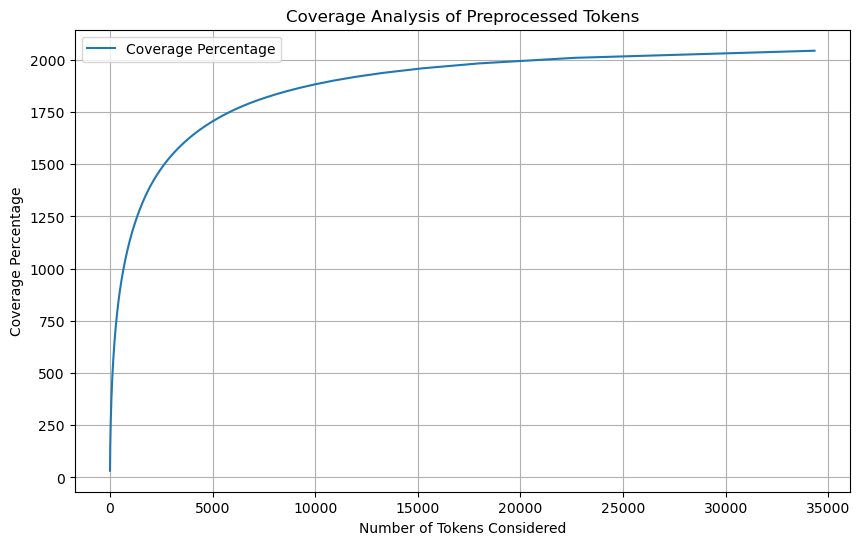

In [35]:
# Function to preprocess the entire corpus and return the list of preprocessed tokens
def preprocess_corpus(corpus):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    preprocessed_tokens = []
    
    for document in corpus:
        tokens = word_tokenize(' '.join(document))
        preprocessed_tokens.extend([lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words and token.isalpha()])
    
    return preprocessed_tokens

# Preprocess the entire corpus
preprocessed_tokens = preprocess_corpus([doc for doc, _ in documents])

# Count the frequency of each unique word in the preprocessed tokens
preprocessed_token_counts = Counter(preprocessed_tokens)

# Get the total number of unique words before and after preprocessing
total_unique_words_before = len(set(word.lower() for doc, _ in documents for word in doc))
total_unique_words_after = len(preprocessed_token_counts)

# Calculate cumulative coverage percentage
sorted_token_counts = sorted(preprocessed_token_counts.values(), reverse=True)
cumulative_counts = np.cumsum(sorted_token_counts)
coverage_percentage = cumulative_counts / total_unique_words_after * 100

# Visualize the coverage analysis
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(coverage_percentage) + 1), coverage_percentage, label='Coverage Percentage')
plt.xlabel('Number of Tokens Considered')
plt.ylabel('Coverage Percentage')
plt.title('Coverage Analysis of Preprocessed Tokens')
plt.legend()
plt.grid(True)
plt.show()

# 3. Algorithm Implementation

In [38]:
# Separate the preprocessed documents and their labels
texts = [' '.join(doc) for doc, _ in preprocessed_documents]
labels = [category for _, category in preprocessed_documents]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Vectorize the data using TF (CountVectorizer)
count_vectorizer = CountVectorizer()
X_train_tf = count_vectorizer.fit_transform(X_train)
X_test_tf = count_vectorizer.transform(X_test)

# Vectorize the data using TF-IDF (TfidfVectorizer)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Naive Bayes

In [37]:
# Train and evaluate the Multinomial Naive Bayes model using TF
nb_tf = MultinomialNB()
nb_tf.fit(X_train_tf, y_train)
y_pred_tf = nb_tf.predict(X_test_tf)

# Train and evaluate the Multinomial Naive Bayes model using TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Print the accuracy and classification report for both models
print("TF Model Accuracy:", accuracy_score(y_test, y_pred_tf))
print("TF Model Classification Report:\n", classification_report(y_test, y_pred_tf))

print("TF-IDF Model Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("TF-IDF Model Classification Report:\n", classification_report(y_test, y_pred_tfidf))

TF Model Accuracy: 0.77
TF Model Classification Report:
               precision    recall  f1-score   support

         neg       0.74      0.79      0.76       188
         pos       0.80      0.75      0.78       212

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400

TF-IDF Model Accuracy: 0.7575
TF-IDF Model Classification Report:
               precision    recall  f1-score   support

         neg       0.70      0.84      0.76       188
         pos       0.82      0.69      0.75       212

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.77      0.76      0.76       400



# Logistic regression classifier

In [40]:
# Train and evaluate the Logistic Regression model using TF
lr_tf = LogisticRegression(max_iter=1000)
lr_tf.fit(X_train_tf, y_train)
y_pred_tf = lr_tf.predict(X_test_tf)

# Train and evaluate the Logistic Regression model using TF-IDF
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

# Print the accuracy and classification report for both models
print("TF Model Accuracy:", accuracy_score(y_test, y_pred_tf))
print("TF Model Classification Report:\n", classification_report(y_test, y_pred_tf))

print("TF-IDF Model Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("TF-IDF Model Classification Report:\n", classification_report(y_test, y_pred_tfidf))

TF Model Accuracy: 0.82
TF Model Classification Report:
               precision    recall  f1-score   support

         neg       0.80      0.82      0.81       188
         pos       0.84      0.82      0.83       212

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

TF-IDF Model Accuracy: 0.795
TF-IDF Model Classification Report:
               precision    recall  f1-score   support

         neg       0.77      0.81      0.79       188
         pos       0.82      0.78      0.80       212

    accuracy                           0.80       400
   macro avg       0.79      0.80      0.79       400
weighted avg       0.80      0.80      0.80       400



# Multi Layer Perceptron (MLP)

In [44]:
# Train and evaluate the MLP model using TF
mlp_tf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
mlp_tf.fit(X_train_tf, y_train)
y_pred_mlp_tf = mlp_tf.predict(X_test_tf)

# Train and evaluate the MLP model using TF-IDF
mlp_tfidf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
mlp_tfidf.fit(X_train_tfidf, y_train)
y_pred_mlp_tfidf = mlp_tfidf.predict(X_test_tfidf)

# Print the accuracy and classification report for the MLP model using TF
print("MLP TF Model Accuracy:", accuracy_score(y_test, y_pred_mlp_tf))
print("MLP TF Model Classification Report:\n", classification_report(y_test, y_pred_mlp_tf))

# Print the accuracy and classification report for the MLP model using TF-IDF
print("MLP TF-IDF Model Accuracy:", accuracy_score(y_test, y_pred_mlp_tfidf))
print("MLP TF-IDF Model Classification Report:\n", classification_report(y_test, y_pred_mlp_tfidf))

MLP TF Model Accuracy: 0.83
MLP TF Model Classification Report:
               precision    recall  f1-score   support

         neg       0.81      0.83      0.82       188
         pos       0.85      0.83      0.84       212

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

MLP TF-IDF Model Accuracy: 0.81
MLP TF-IDF Model Classification Report:
               precision    recall  f1-score   support

         neg       0.79      0.81      0.80       188
         pos       0.83      0.81      0.82       212

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



C:\Users\prana\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# 4. Training and Evaluation

We have already preprocessed the data and split it into training and testing sets. Now, we will train each algorithm (Multinomial Naive Bayes, Logistic Regression, and MLP) using TF and TF-IDF feature representations.

In [54]:
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)  # True Positive Rate
    fpr = fp / (fp + tn)  # False Positive Rate
    return accuracy, tpr, fpr

# Initialize results dictionary
results = {}

# Multinomial Naive Bayes Classifier
def train_evaluate_nb(X_train, X_test, y_train, y_test, vectorizer_name):
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy, tpr, fpr = calculate_metrics(y_test, y_pred)
    results[f'Naive Bayes {vectorizer_name}'] = (accuracy, tpr, fpr)

# Logistic Regression Classifier
def train_evaluate_lr(X_train, X_test, y_train, y_test, vectorizer_name):
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy, tpr, fpr = calculate_metrics(y_test, y_pred)
    results[f'Logistic Regression {vectorizer_name}'] = (accuracy, tpr, fpr)

# MLP Classifier
def train_evaluate_mlp(X_train, X_test, y_train, y_test, vectorizer_name):
    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy, tpr, fpr = calculate_metrics(y_test, y_pred)
    results[f'MLP Classifier {vectorizer_name}'] = (accuracy, tpr, fpr)

# Train and evaluate classifiers using TF (CountVectorizer)
train_evaluate_nb(X_train_tf, X_test_tf, y_train, y_test, 'TF')
train_evaluate_lr(X_train_tf, X_test_tf, y_train, y_test, 'TF')
train_evaluate_mlp(X_train_tf, X_test_tf, y_train, y_test, 'TF')

# Train and evaluate classifiers using TF-IDF (TfidfVectorizer)
train_evaluate_nb(X_train_tfidf, X_test_tfidf, y_train, y_test, 'TF-IDF')
train_evaluate_lr(X_train_tfidf, X_test_tfidf, y_train, y_test, 'TF-IDF')
train_evaluate_mlp(X_train_tfidf, X_test_tfidf, y_train, y_test, 'TF-IDF')

# Print results
for model, metrics in results.items():
    accuracy, tpr, fpr = metrics
    print(f"{model} - Accuracy: {accuracy:.4f}, TPR: {tpr:.4f}, FPR: {fpr:.4f}")

Naive Bayes TF - Accuracy: 0.7700, TPR: 0.7500, FPR: 0.2074
Logistic Regression TF - Accuracy: 0.8200, TPR: 0.8160, FPR: 0.1755
MLP Classifier TF - Accuracy: 0.8300, TPR: 0.8302, FPR: 0.1702
Naive Bayes TF-IDF - Accuracy: 0.7575, TPR: 0.6887, FPR: 0.1649
Logistic Regression TF-IDF - Accuracy: 0.7950, TPR: 0.7783, FPR: 0.1862
MLP Classifier TF-IDF - Accuracy: 0.8100, TPR: 0.8113, FPR: 0.1915


# 5. Visualisation and Analysis

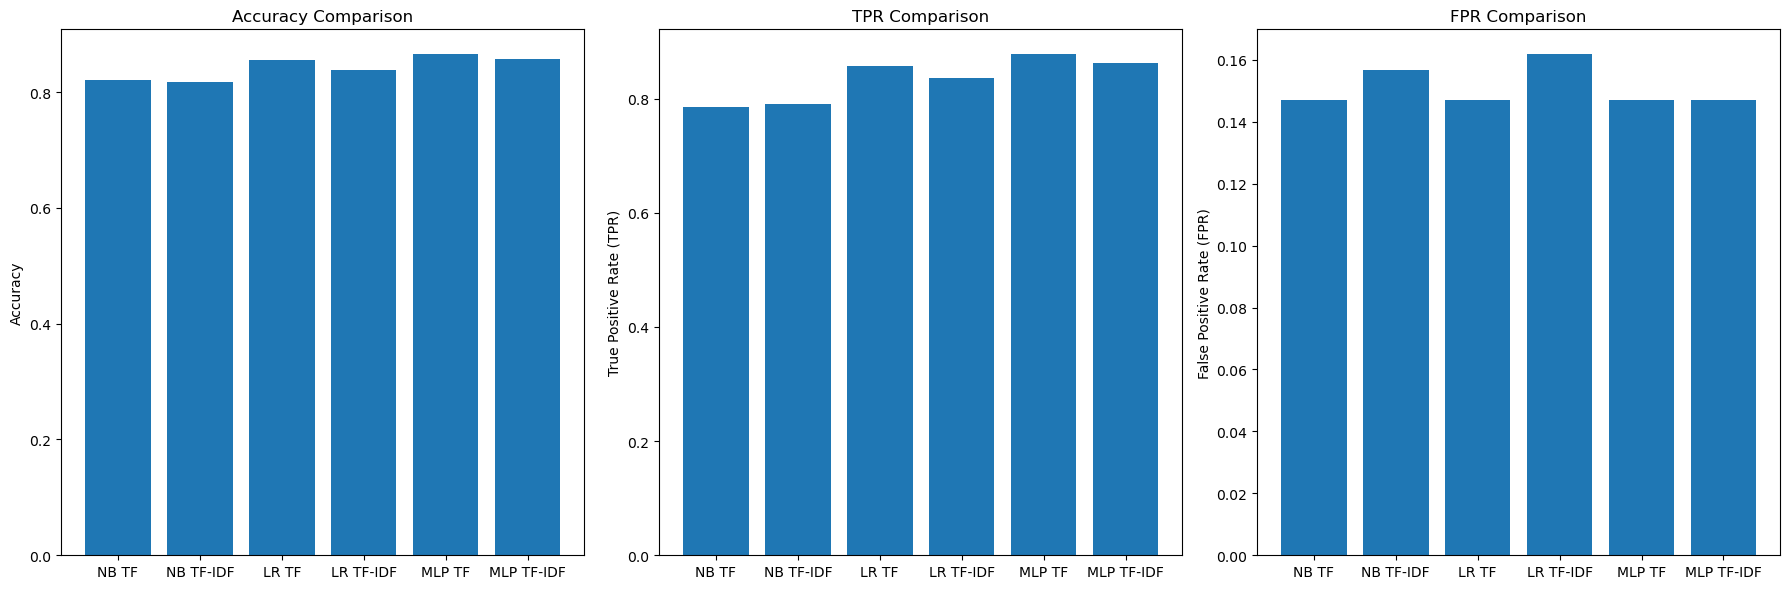

In [53]:
# Extract metrics for each model
nb_tf = results_df.loc['NB TF']
nb_tfidf = results_df.loc['NB TF-IDF']
lr_tf = results_df.loc['LR TF']
lr_tfidf = results_df.loc['LR TF-IDF']
mlp_tf = results_df.loc['MLP TF']
mlp_tfidf = results_df.loc['MLP TF-IDF']

# Plot bar charts
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy
ax[0].bar(['NB TF', 'NB TF-IDF', 'LR TF', 'LR TF-IDF', 'MLP TF', 'MLP TF-IDF'], 
          [nb_tf['Accuracy'], nb_tfidf['Accuracy'], lr_tf['Accuracy'], lr_tfidf['Accuracy'], mlp_tf['Accuracy'], mlp_tfidf['Accuracy']])
ax[0].set_title('Accuracy Comparison')
ax[0].set_ylabel('Accuracy')

# TPR
ax[1].bar(['NB TF', 'NB TF-IDF', 'LR TF', 'LR TF-IDF', 'MLP TF', 'MLP TF-IDF'], 
          [nb_tf['TPR'], nb_tfidf['TPR'], lr_tf['TPR'], lr_tfidf['TPR'], mlp_tf['TPR'], mlp_tfidf['TPR']])
ax[1].set_title('TPR Comparison')
ax[1].set_ylabel('True Positive Rate (TPR)')

# FPR
ax[2].bar(['NB TF', 'NB TF-IDF', 'LR TF', 'LR TF-IDF', 'MLP TF', 'MLP TF-IDF'], 
          [nb_tf['FPR'], nb_tfidf['FPR'], lr_tf['FPR'], lr_tfidf['FPR'], mlp_tf['FPR'], mlp_tfidf['FPR']])
ax[2].set_title('FPR Comparison')
ax[2].set_ylabel('False Positive Rate (FPR)')

plt.tight_layout()
plt.show()